In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pymongo


In [61]:
def readcsv(path,limit,sep):
    if limit == 0:
        df = pd.read_csv(path,sep=sep)
    else:
        df = pd.read_csv(path, nrows=limit,sep=sep)
    return df

df_data_agrupada = readcsv("data2.csv",0,";")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 983: invalid continuation byte

In [62]:
import pandas as pd
import random

# Assuming you have a DataFrame named 'df' and two dates named 'start_date' and 'end_date'

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime('2023-04-01')
end_date = pd.to_datetime('2023-05-28')

# Generate random dates between start_date and end_date
df_data_agrupada['date'] = [start_date + pd.DateOffset(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(df_data_agrupada))]

# Display the updated DataFrame
df_data_agrupada.head(3)
# df_data_agrupada.info()





,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,preprocessed_text,preprocessed_text_2,sentiment_label,sentiment_value,emotion_label,emotion_value,Entity,date-and
0,Christopher Hodina,NaN,NaN,8/11/2014 4:12,7.0,58.0,2.0,False,2023-04-15,SimpleC found #bitcoin in a Blue vault at this...,...,Twitter for Android,False,SimpleC found #bitcoin in a Blue vault at this...,SimpleC found in a Blue vault at this locatio...,Positive,0.975979,joy,0.554319,"[{'I-ORG': 0.5878607, 'word': 'Simple'}, {'I-O...",2023-04-27
1,Dark Side 😼,NaN,+++++++,28/04/2020 18:26,239.0,109.0,6435.0,False,2023-05-04,@Minecraft #Bitcoin Genesis Block !,...,Twitter Web App,False,@user #Bitcoin Genesis Block !,Genesis Block !,Neutral,0.732919,others,0.713857,"[{'I-ORG': 0.5513477, 'word': 'Genesis'}, {'I-...",2023-04-02
2,thesizeofURpie,NeverLand,Making finance fun through music. Explaining t...,28/02/2022 7:59,7.0,63.0,14.0,False,2023-04-06,#Bitcoin is like a rock. Fiat is like grass. h...,...,Twitter for iPhone,False,#Bitcoin is like a rock. Fiat is like grass. http,is like a rock. Fiat is like grass. http,Neutral,0.596278,others,0.903811,"[{'I-ORG': 0.9959508, 'word': 'Fiat'}]",2023-04-09


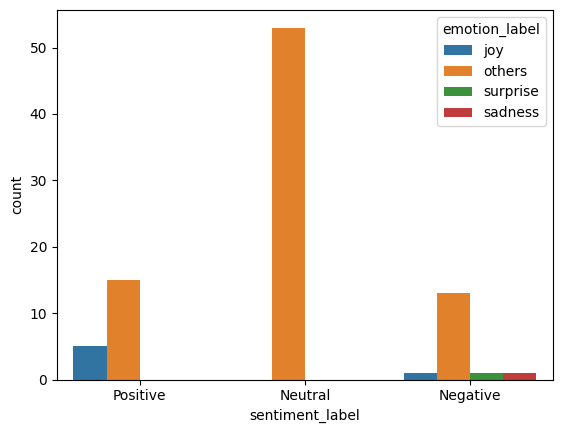

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the categorical variables are 'variable1' and 'variable2'

sns.countplot(x='sentiment_label', hue='emotion_label', data=df_data_agrupada)
plt.show()


In [55]:
# df_Entity = pd.DataFrame([df_data_agrupada["Entity"]])

# df_data = pd.json_normalize(df_data_agrupada['Entity'])


# df_data = df_data_agrupada['Entity']


df_data = pd.json_normalize(df_data_agrupada['Entity'].explode())

df_data


""
0
1
2
3
4
...
95
96
97
98


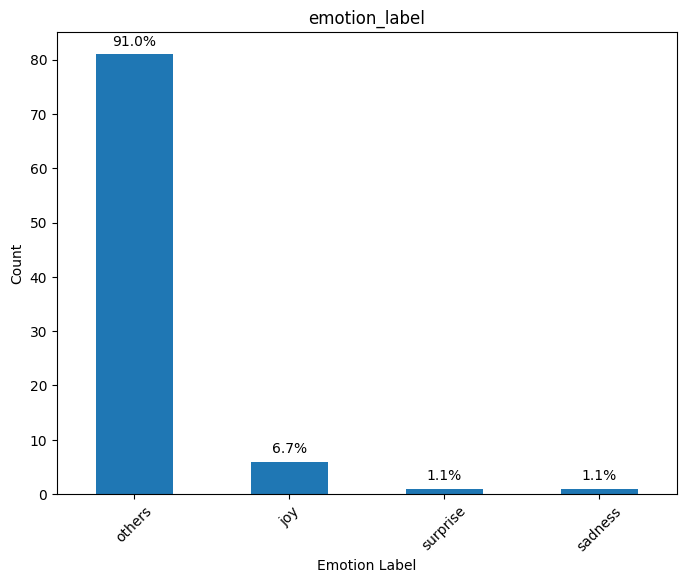

In [48]:
# Calculate the percentage values
value_counts = df_data_agrupada['emotion_label'].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Plot the bar chart with percentages
plt.figure(figsize=(8, 6))
ax = df_data_agrupada['emotion_label'].value_counts().plot(kind='bar')
ax.set_title('emotion_label')
ax.set_xlabel('Emotion Label')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the percentage values on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v + 1, f"{percentages[i]:.1f}%", ha='center', va='bottom')

plt.show()
